### Импорт библиотек

In [1]:
# data manipulation
import pandas as pd

# data visualisation
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets

### Загрузка данных

In [2]:
data = pd.read_csv('./train.csv')[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

In [3]:
# pd.set_option('display.max_rows', 100)
# data.fillna(0).sample(10).T
# data['CentralAir'].value_counts(dropna=False)
# data.nunique()

### Полезные фишечки

In [4]:
data.head()
# data.tail()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,856,2,2003
1,181500,6,1262,2,1262,2,1976
2,223500,7,1786,2,920,2,2001
3,140000,7,1717,3,756,1,1915
4,250000,8,2198,3,1145,2,2000


In [5]:
data.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt'],
      dtype='object')

In [6]:
data.shape

(1460, 7)

In [7]:
data.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808
std,79442.502883,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000
25%,129975.000000,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000
50%,163000.000000,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000
75%,214000.000000,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000
max,755000.000000,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000


In [13]:
data.dtypes

SalePrice      int64
OverallQual    int64
GrLivArea      int64
GarageCars     int64
TotalBsmtSF    int64
FullBath       int64
YearBuilt      int64
dtype: object

In [14]:
data['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [12]:
data['GarageCars'].value_counts(normalize=True)

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

In [15]:
data['SalePrice'].quantile([.5,.7,.9,.99])

0.50    163000.00
0.70    198620.00
0.90    278000.00
0.99    442567.01
Name: SalePrice, dtype: float64

In [17]:
data['SalePrice'].min(), data['SalePrice'].max(), data['SalePrice'].median(), data['SalePrice'].mean()

(34900, 755000, 163000.0, 180921.19589041095)

In [18]:
data['SalePrice'].agg(['min','max','mean','median'])

min        34900.00000
max       755000.00000
mean      180921.19589
median    163000.00000
Name: SalePrice, dtype: float64

### Типы данных
Признаки делятся на:
- количественные (numeric)
- категориальные (categorical)

Количественные - непрерывные (continuous) и дискретные (discrete) </br>
Категориальные - номинативные (nominal) и порядковые (ordinal)


### Numeric

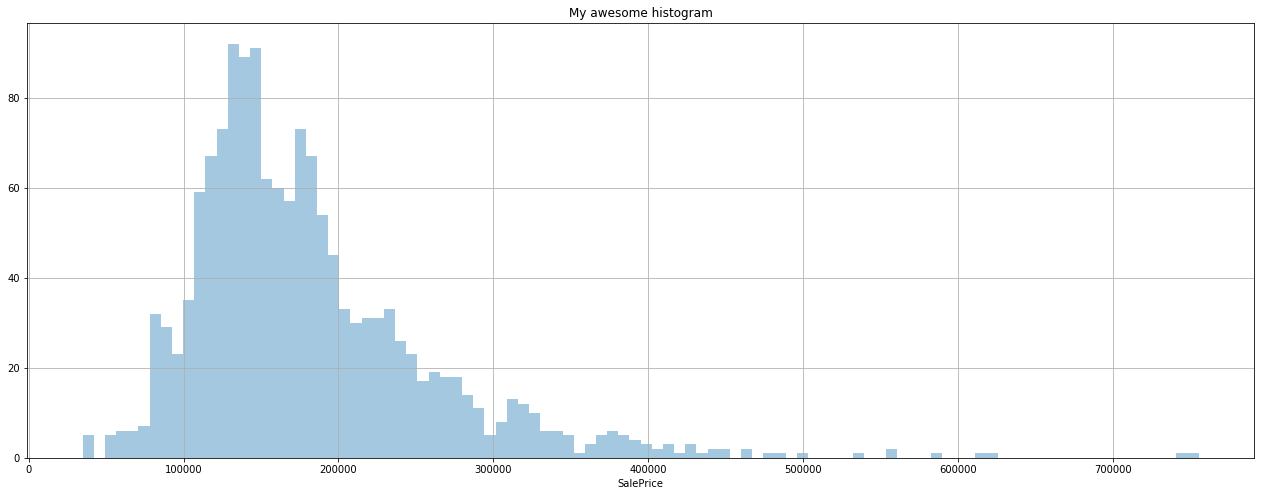

In [19]:
# ax = data.SalePrice.plot(kind='hist', figsize=(22,8), bins=200, xlim=(0,500000), facecolor='g', alpha=0.75);
plt.figure(figsize=(22,8));
ax = sns.distplot(data.SalePrice, kde=False, hist=True, bins=100);
ax.set_title('My awesome histogram');
ax.grid(True);

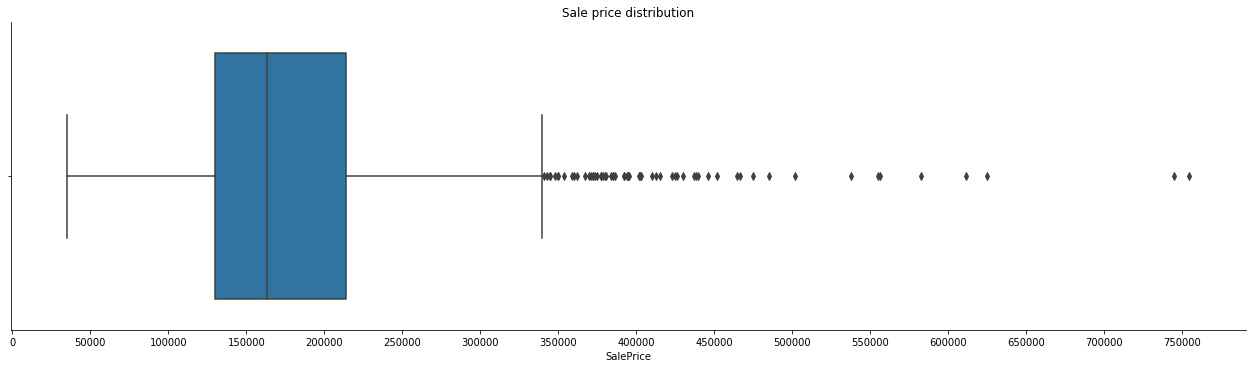

In [20]:
ax = sns.catplot(data=data, x='SalePrice', kind='box', aspect=3.5);
ax.set(title=('Sale price distribution'), xticks=range(0,800000,50000));

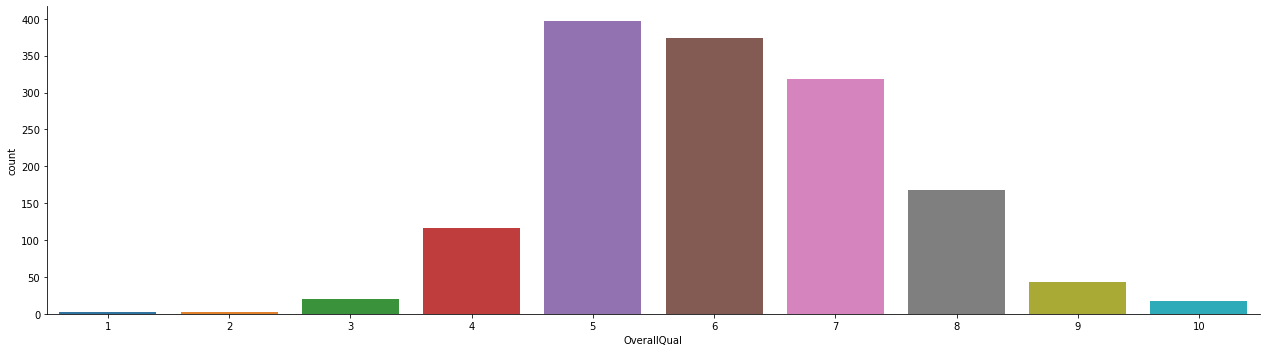

In [21]:
ax = sns.catplot(data=data, x='OverallQual', aspect=3.5, kind='count')

### Pair relations

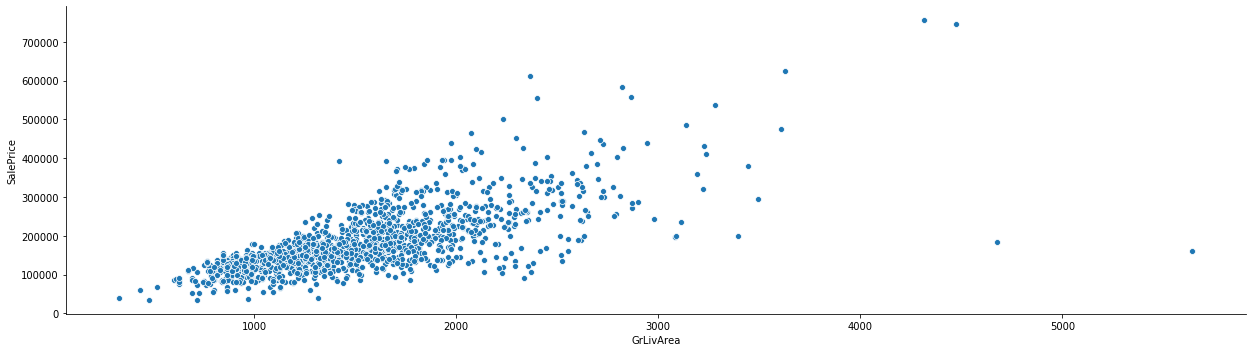

In [22]:
ax = sns.relplot(data=data, y='SalePrice', x='GrLivArea', kind='scatter', aspect=3.5)

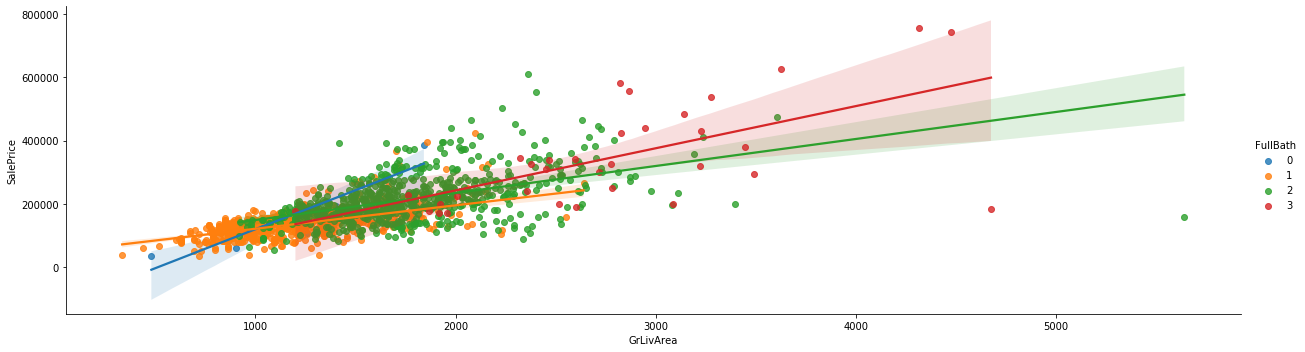

In [23]:
ax = sns.lmplot(data=data, y='SalePrice', x='GrLivArea', hue='FullBath', aspect=3.5);

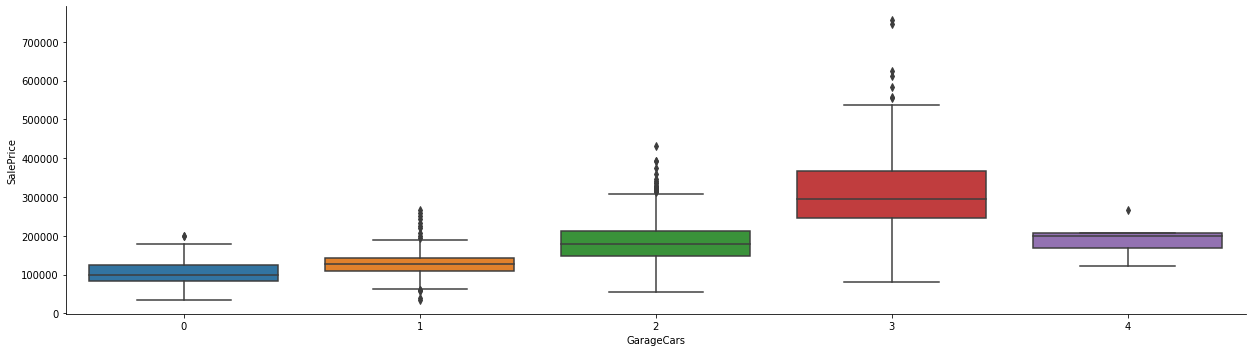

In [24]:
ax = sns.catplot(data=data, y='SalePrice', x='GarageCars', kind='box', aspect=3.5)

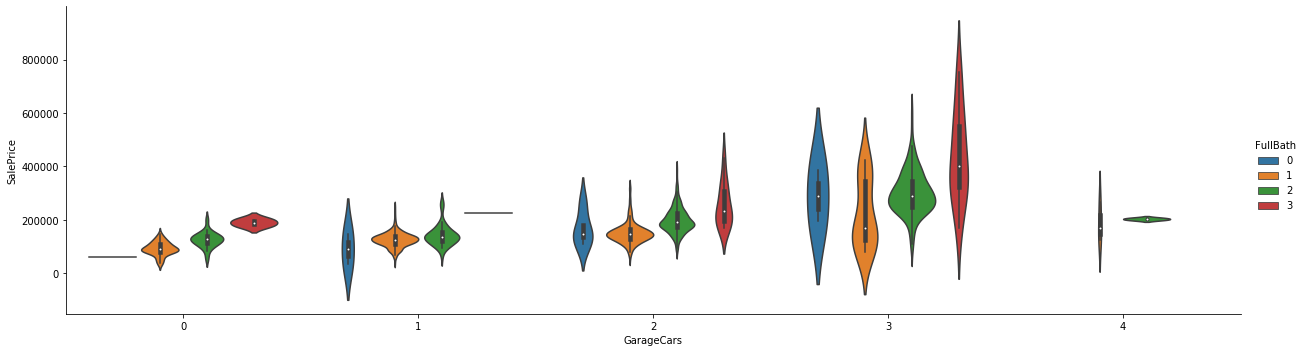

In [27]:
ax = sns.catplot(data=data, y='SalePrice', x='GarageCars', kind='violin', hue='FullBath', aspect=3.5)

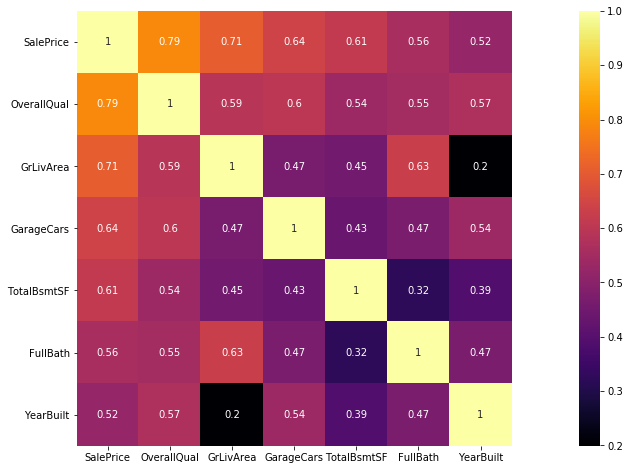

In [28]:
corr = data.corr(method='pearson')

plt.figure(figsize=(24,8));
sns.heatmap(corr, square=True, cmap='inferno', annot=True);

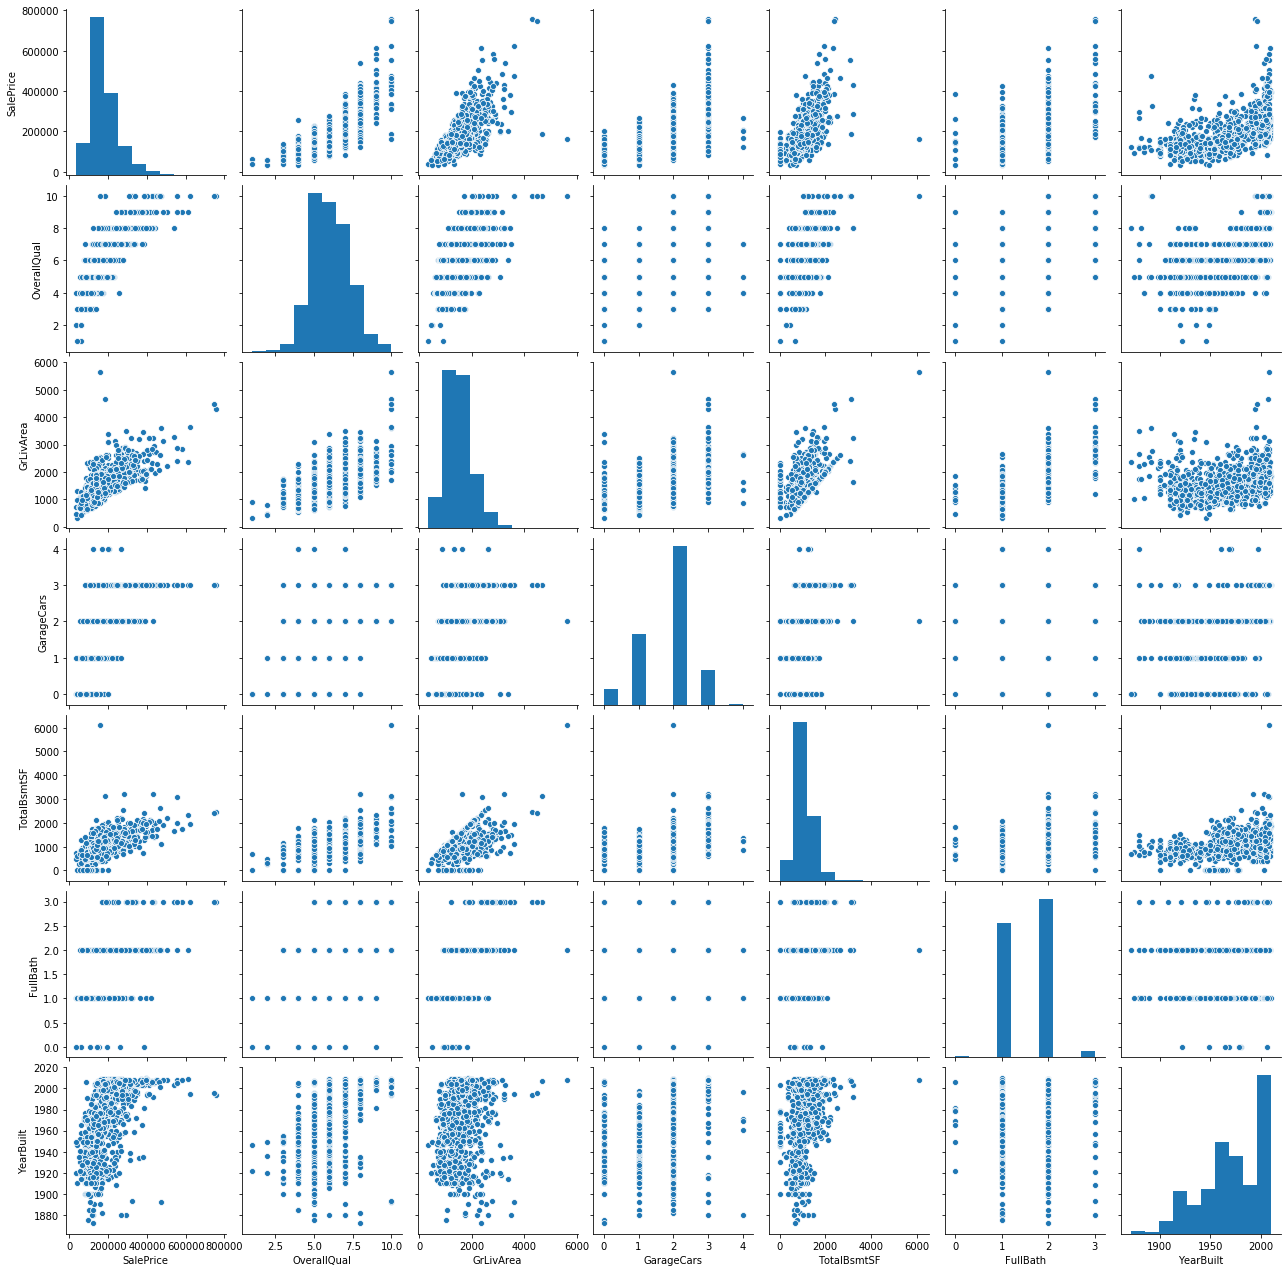

In [29]:
sns.pairplot(data);

In [30]:
import pandas_profiling as pf

In [33]:
profile = pf.ProfileReport(data)
# profile.to_widgets()

In [34]:
profile.to_file(output_file="output.html")